# Stockdata API

In [1]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY") #API key is saved in .env
symbol = "AAPL" #Apple inc stock

#print(api_key) #Prints out the API-key

In [3]:
#We can change things in the link/string
#url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo"
#We change demo to api_key
#See documentation: https://www.alphavantage.co/documentation/

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"

#data = requests.get(url)
#data #<Response [200]> means it work (there are different codes for this)
data = requests.get(url).json() #From this we can change it to a json format
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2021-10-29',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2021-10-29': {'1. open': '147.2150',
   '2. high': '149.9400',
   '3. low': '146.4128',
   '4. close': '149.8000',
   '5. volume': '124953168'},
  '2021-10-28': {'1. open': '149.8200',
   '2. high': '153.1650',
   '3. low': '149.7200',
   '4. close': '152.5700',
   '5. volume': '100077888'},
  '2021-10-27': {'1. open': '149.3600',
   '2. high': '149.7300',
   '3. low': '148.4900',
   '4. close': '148.8500',
   '5. volume': '56094929'},
  '2021-10-26': {'1. open': '149.3300',
   '2. high': '150.8400',
   '3. low': '149.0101',
   '4. close': '149.3200',
   '5. volume': '60893395'},
  '2021-10-25': {'1. open': '148.6800',
   '2. high': '149.3700',
   '3. low': '147.6211',
   '4. close': '148.6400',
   '5. volume': '50720556'},
  '2021-10-22': {'1. open': 

In [4]:
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float) #Pick out Time Series (Daily) and change format
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [5]:
df.index #dtype="object", but looks like dates

Index(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19', '2021-10-18',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5536)

In [9]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [10]:
df.loc["2021"] #Only gets data for 2021

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
...,...,...,...,...,...
2021-01-08,132.430,132.6300,130.2300,132.05,105158245.0
2021-01-07,128.360,131.6300,127.8600,130.92,109578157.0
2021-01-06,127.720,131.0499,126.3820,126.60,155087970.0
2021-01-05,128.890,131.7400,128.4300,131.01,97664898.0


In [11]:
df.loc["2021-10"] #We use the index and enter string data

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
2021-10-22,149.690,150.1800,148.6400,148.69,58883443.0
2021-10-21,148.810,149.6400,147.8700,149.48,61420990.0
2021-10-20,148.700,149.7539,148.1200,149.26,58418788.0
2021-10-19,147.010,149.1700,146.5500,148.76,76378894.0
2021-10-18,143.445,146.8400,143.1600,146.55,85589175.0


In [12]:
df.loc["2021-10-20":"2021-10-29"] #We can also slice it

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [13]:
import time
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

for symbol in symbols: #Use symbol to change the url and download different dataframes
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json() 
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float) #Rename it to the symbol
    stock_list.append(df)
    time.sleep(10) #To not overload the API

In [19]:
stocks = pd.DataFrame(stock_list).transpose() #Transpose changes it to long format

,AAPL,TSLA,NVDA,IBM
2021-10-29,149.80,1114.00,255.67,125.10
2021-10-28,152.57,1077.04,249.41,125.84
2021-10-27,148.85,1037.86,244.51,125.17
2021-10-26,149.32,1018.43,247.17,127.13
2021-10-25,148.64,1024.86,231.66,127.64
...,...,...,...,...
1999-11-05,88.31,NaN,28.25,90.25
1999-11-04,83.62,NaN,29.19,91.56
1999-11-03,81.50,NaN,27.44,94.37
1999-11-02,80.25,NaN,25.00,94.81


In [20]:
#Saves the file as csv
#stocks_csv = pd.concat(stock_list, axis=1)
#stocks_csv.to_csv("stocks.csv") #This creates a csv file

#Reads in the CSV, parse_dates=True changes the dates to datetime
#stocks = pd.read_csv(stocks_csv, index_col=0, parse_dates=True)

In [22]:
stocks.index = pd.to_datetime(stocks.index) #Change the index values to datetime
stocks.index

DatetimeIndex(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26',
               '2021-10-25', '2021-10-22', '2021-10-21', '2021-10-20',
               '2021-10-19', '2021-10-18',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', length=5536, freq=None)

In [23]:
stocks.loc["2020"]

,AAPL,TSLA,NVDA,IBM
2020-12-31,132.69,705.67,522.20,125.88
2020-12-30,133.72,694.78,525.83,124.34
2020-12-29,134.87,665.99,517.73,123.80
2020-12-28,136.69,663.69,516.00,124.82
2020-12-24,131.97,661.77,519.75,124.69
...,...,...,...,...
2020-01-08,303.19,492.14,240.38,135.31
2020-01-07,298.39,469.06,239.93,134.19
2020-01-06,299.80,451.54,237.06,134.10
2020-01-03,297.43,443.01,236.07,134.34


In [24]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5536 non-null   float64
 1   TSLA    2856 non-null   float64
 2   NVDA    5536 non-null   float64
 3   IBM     5536 non-null   float64
dtypes: float64(4)
memory usage: 216.2 KB


(2, 2)
(4,)


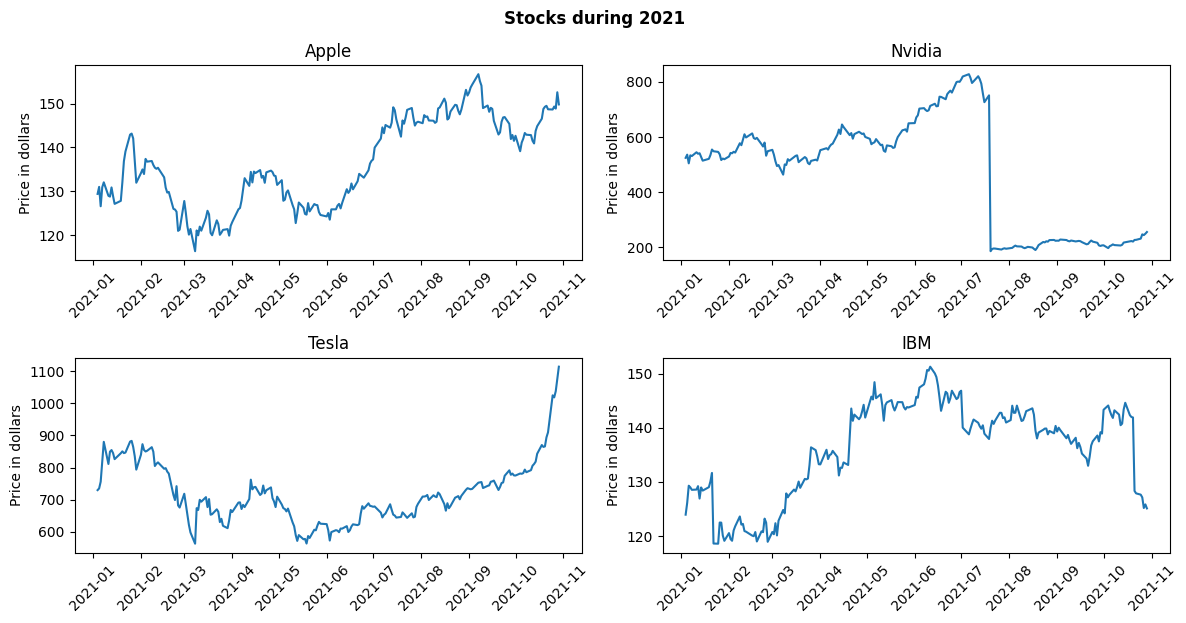

In [42]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12, 6))
print(axes.shape) #2,2 array
print(axes.flatten().shape) #The array is no longer 2D it is 4 (which means we can loop through it)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL="Apple", NVDA="Nvidia", TSLA="Tesla", IBM="IBM")
for ax, symbol in zip(axes.flatten(), stock_names): #stock_names gives the keys 
    #print(symbol)
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax) #We set the ax to our ax object
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")